In [1]:
import tensorflow as tf
print(tf.test.gpu_device_name())
# See https://www.tensorflow.org/tutorials/using_gpu#allowing_gpu_memory_growth
config = tf.ConfigProto()
config.gpu_options.allow_growth = True

/device:GPU:0


In [2]:
from keras import backend as K
K.clear_session()

with tf.Session() as sess:
        sess = tf.Session()
        K.set_session(sess)

Using TensorFlow backend.


In [3]:
init_op = tf.global_variables_initializer()

sess = tf.Session()
sess.run(init_op)

In [4]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 14917789713119957635, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 9202108990
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 8580261680154293679
 physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:01:00.0, compute capability: 6.1"]

In [1]:
import os
import pandas as pd

import numpy as np
from glob import glob
import cv2
import skimage
from skimage.transform import resize

from keras import layers
from keras import models
from keras import optimizers
from keras.models import load_model
import keras.callbacks as kcall
from keras.optimizers import Adam
from keras.models import Model
from keras.models import Sequential
from keras.layers import Flatten, Dense, Activation, Dropout, Conv2D, MaxPooling2D, BatchNormalization, ZeroPadding2D
from keras.applications.xception import Xception, preprocess_input
from keras.regularizers import l2
from keras.layers.normalization import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt

%matplotlib inline

/home/sara/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/sara/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/sara/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/sara/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/sara/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility
  return f(*args, **kwds)
/home/sara/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: Future

In [2]:
train_dir = 'data/train'
validation_dir = 'data/validation'

In [3]:
for root,dirs,files in os.walk(train_dir):
    print (root, len(files))

data/train 0
data/train/MEL 3308
data/train/DF 4152
data/train/BKL 3275
data/train/BCC 4773
data/train/VASC 3488
data/train/AKIEC 3856
data/train/NV 4975


In [4]:
for root,dirs,files in os.walk(validation_dir):
    print (root, len(files))

data/validation 0
data/validation/MEL 1664
data/validation/DF 1632
data/validation/BKL 1479
data/validation/BCC 1692
data/validation/VASC 1484
data/validation/AKIEC 1552
data/validation/NV 1730


In [5]:
## Intilizing variables
output_classes = 7

batch_size = 64
epochs = 50
adam_opt = Adam(lr=1e-5, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=1e-5)

In [6]:
from keras.preprocessing.image import ImageDataGenerator

# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    featurewise_center=True,
    featurewise_std_normalization=True)


# target_size = (height, width)
target_size = (224, 224)


train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size = target_size,       
        class_mode = 'categorical',
        shuffle = False)

validation_generator = train_datagen.flow_from_directory(
        validation_dir,
        target_size = target_size,        
        class_mode = 'categorical',
        shuffle = False)

Found 27827 images belonging to 7 classes.
Found 11233 images belonging to 7 classes.


In [ ]:
from keras.models import load_model
model = load_model("models/2.Xception2-Adam-without-Dropout-Model.h5", custom_objects={'fmeasure': fmeasure,  'recall': recall, 'precision': precision })
model.load_weights("models/2.Xception2-Adam-without-Dropout-Weights.h5")

In [11]:
alexnet = Sequential()
l2_reg=0
# Layer 1
alexnet.add(Conv2D(64, (11, 11), input_shape=(224, 224, 3),padding='same', kernel_regularizer=l2(l2_reg)))
alexnet.add(BatchNormalization())
alexnet.add(Activation('relu'))
alexnet.add(MaxPooling2D(pool_size=(2, 2)))

# Layer 2
alexnet.add(Conv2D(128, (5, 5), padding='same'))
alexnet.add(BatchNormalization())
alexnet.add(Activation('relu'))
alexnet.add(MaxPooling2D(pool_size=(2, 2)))

# Layer 3
alexnet.add(Conv2D(256, 3, 3, activation='relu', border_mode='same'))
alexnet.add(BatchNormalization())
alexnet.add(Activation('relu'))
alexnet.add(MaxPooling2D(pool_size=(2, 2)))

# Layer 4
alexnet.add(Conv2D(512, 3, 3, activation='relu', border_mode='same'))
alexnet.add(BatchNormalization())
alexnet.add(Activation('relu'))

# Layer 5
alexnet.add(Conv2D(512, 3, 3, activation='relu', border_mode='same'))
alexnet.add(BatchNormalization())
alexnet.add(Activation('relu'))
alexnet.add(MaxPooling2D(pool_size=(2, 2)))

# Layer 6
alexnet.add(Flatten())
alexnet.add(Dense(1024))
alexnet.add(BatchNormalization())
alexnet.add(Activation('relu'))
alexnet.add(Dropout(0.6))


# Layer 8
alexnet.add(Dense(7))#7classes
alexnet.add(BatchNormalization())
alexnet.add(Activation('softmax'))
# alexnet.summary()

c:\users\reza-lab\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (3, 3), padding="same", activation="relu")`
  app.launch_new_instance()
c:\users\reza-lab\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:22: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(512, (3, 3), padding="same", activation="relu")`
c:\users\reza-lab\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:27: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(512, (3, 3), padding="same", activation="relu")`


In [12]:
alexnet.compile(loss='categorical_crossentropy',
              optimizer=adam_opt,
              metrics=['accuracy'])

In [13]:
history = alexnet.fit_generator(train_generator,
    steps_per_epoch=2048,
    epochs = epochs,
    validation_data = validation_generator,
    validation_steps=1024)

Epoch 1/50


c:\users\reza-lab\appdata\local\programs\python\python35\lib\site-packages\keras_preprocessing\image.py:1131: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
c:\users\reza-lab\appdata\local\programs\python\python35\lib\site-packages\keras_preprocessing\image.py:1139: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


2048/2048 [==============================] - 556s 271ms/step - loss: 0.9213 - acc: 0.7549 - val_loss: 1.0722 - val_acc: 0.6936
Epoch 2/50
2048/2048 [==============================] - 534s 261ms/step - loss: 0.5948 - acc: 0.9279 - val_loss: 0.9883 - val_acc: 0.7483
Epoch 3/50
2048/2048 [==============================] - 541s 264ms/step - loss: 0.4873 - acc: 0.9735 - val_loss: 0.9404 - val_acc: 0.7802
Epoch 4/50
2048/2048 [==============================] - 536s 262ms/step - loss: 0.4315 - acc: 0.9886 - val_loss: 0.9003 - val_acc: 0.7915
Epoch 5/50
2048/2048 [==============================] - 537s 262ms/step - loss: 0.3987 - acc: 0.9937 - val_loss: 0.8821 - val_acc: 0.7758
Epoch 6/50
2048/2048 [==============================] - 537s 262ms/step - loss: 0.3747 - acc: 0.9955 - val_loss: 0.8443 - val_acc: 0.8015
Epoch 7/50
2048/2048 [==============================] - 535s 261ms/step - loss: 0.3554 - acc: 0.9968 - val_loss: 0.8159 - val_acc: 0.7996
Epoch 8/50
2048/2048 [=======================

In [18]:
score = alexnet.evaluate_generator(validation_generator, steps=50)

print ('Test Score: ', score[0])
print ('Test Accuracy: ',score[1])

Test Score:  0.691382120847702
Test Accuracy:  0.78625


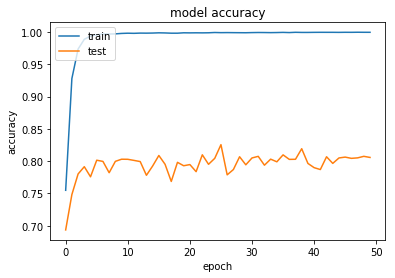

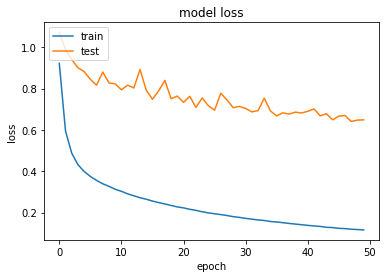

In [19]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [22]:
filename = validation_generator.filenames
truth = validation_generator.classes
label = validation_generator.class_indices
indexlabel = dict((value, key) for key, value in label.items())

predicts = alexnet.predict_generator(validation_generator, steps=validation_generator.samples/validation_generator.batch_size, verbose=1)
predict_class = np.argmax(predicts, axis=1)
errors = np.where(predict_class != truth)[0]
print("No of errors = {}/{}".format(len(errors),validation_generator.samples))

352/351 [==============================] - 34s 96ms/step
No of errors = 9561/11233


Confusion matrix
[[160 225 248 163 245 344 167]
 [188 286 273 152 248 376 169]
 [154 247 270 141 219 287 161]
 [173 240 327 168 260 303 161]
 [169 289 277 156 271 336 166]
 [181 282 296 183 254 367 167]
 [153 232 250 171 248 280 150]]


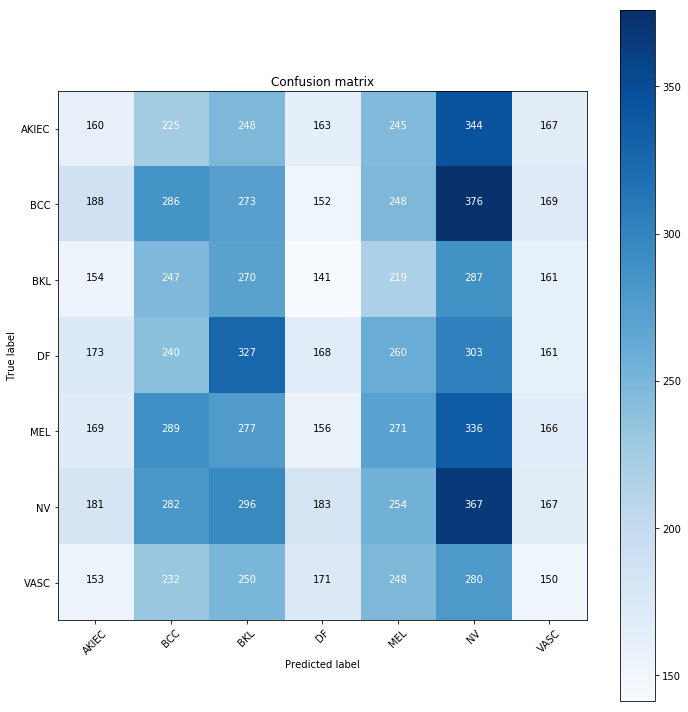

In [24]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(truth,predict_class)

labels = []
for k,v in indexlabel.items():
    labels.append(v)
    
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    

plt.figure(figsize=(10,10))
plot_confusion_matrix(cm, classes=labels,
                      title='Confusion matrix')

In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

#and reports metrics with classification_report method
def predict_and_report(gen, model):
    y_true = []
    y_pred = []
    gen.reset()
    for img, label in gen:
        #get true labels for batch and store them
        y_true.extend([int(z[1]) for z in label])
        #Get predictions as probabilities
        batch_pred = model.predict_on_batch(img)
        #turn probabilities to class labels and store
        batch_pred = np.argmax(batch_pred, axis=1)
        y_pred.extend(batch_pred)
        #break loop
        if gen.batch_index == 0:
            break
            
    print('Accuracy:', accuracy_score(y_true, y_pred))
    print('Area Under the Receiver Operating Characteristic Curve:', roc_auc_score(y_true, y_pred)) #Area under the curve
    print(classification_report(y_true, y_pred))

In [ ]:
predict_and_report(train_generator, model)

In [ ]:
predict_and_report(validation_generator, model)

In [ ]:
model.save('models/2.Alex-Dropout-Model.h5')
model.save_weights('models/2.Alex-Dropout-Weights.h5')

In [ ]:
#####################################################################################

In [9]:
from keras.preprocessing.image import ImageDataGenerator

# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    featurewise_center=True,
    featurewise_std_normalization=True)


# target_size = (height, width)
target_size = (448, 448)


train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size = target_size,       
        class_mode = 'categorical',
        shuffle = True)

validation_generator = train_datagen.flow_from_directory(
        validation_dir,
        target_size = target_size,        
        class_mode = 'categorical',
        shuffle = True)

Found 27827 images belonging to 7 classes.
Found 11233 images belonging to 7 classes.


In [13]:
model = Sequential()

## Architecture
model.add(Conv2D( filters = 96, kernel_size = (11,11), strides = 4, padding = 'same', activation = 'relu', 
                 input_shape = (448, 448, 3), kernel_initializer = 'he_normal'))
model.add(MaxPooling2D( pool_size = (3,3), strides = (2,2), padding= 'same', data_format = None)) # overlapping pooling

model.add(Conv2D( filters = 256, kernel_size = (5,5), strides = 1, padding = 'same', activation = 'relu', kernel_initializer = 'he_normal'))
model.add(MaxPooling2D( pool_size = (3,3), strides = (2,2), padding= 'same', data_format = None)) 

model.add(Conv2D( filters = 384, kernel_size = (3,3), strides = 1, padding = 'same', activation = 'relu', kernel_initializer = 'he_normal'))
model.add(Conv2D( filters = 384, kernel_size = (3,3), strides = 1, padding = 'same', activation = 'relu', kernel_initializer = 'he_normal'))
model.add(Conv2D( filters = 256, kernel_size = (3,3), strides = 1, padding = 'same', activation = 'relu', kernel_initializer = 'he_normal'))
model.add(MaxPooling2D( pool_size = (3,3), strides = (2,2), padding= 'same', data_format = None))

model.add(Flatten())
model.add(Dense( units = 4096, activation = 'relu'))
model.add(Dense( units = 4096, activation = 'relu'))

model.add(Dense( units = 7, activation = 'softmax'))
model.summary()

## Optimizer
adam = optimizers.adam(lr=0.00005, beta_1 = 0.9, beta_2 = 0.999, epsilon = None, decay= 0, amsgrad = False)
momentum = optimizers.SGD(lr=0.01, momentum = 0.9, decay=1e-6)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 112, 112, 96)      34944     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 96)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 256)       614656    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 256)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 384)       885120    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 384)       1327488   
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 28, 256)       884992    
__________

In [14]:
from keras import losses, metrics, regularizers
model.compile(optimizer = adam, loss = losses.categorical_crossentropy, metrics=[metrics.categorical_accuracy])

In [15]:
history = model.fit_generator(train_generator,
    steps_per_epoch=2048,
    epochs = epochs,
    validation_data = validation_generator,
    validation_steps=1024)

Epoch 1/50


c:\users\reza-lab\appdata\local\programs\python\python35\lib\site-packages\keras_preprocessing\image.py:1131: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
c:\users\reza-lab\appdata\local\programs\python\python35\lib\site-packages\keras_preprocessing\image.py:1139: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


2048/2048 [==============================] - 596s 291ms/step - loss: 0.8019 - categorical_accuracy: 0.6962 - val_loss: 0.8444 - val_categorical_accuracy: 0.7406
Epoch 2/50
2048/2048 [==============================] - 566s 276ms/step - loss: 0.2322 - categorical_accuracy: 0.9126 - val_loss: 1.1172 - val_categorical_accuracy: 0.7785
Epoch 3/50
2048/2048 [==============================] - 569s 278ms/step - loss: 0.0944 - categorical_accuracy: 0.9661 - val_loss: 1.2702 - val_categorical_accuracy: 0.7727
Epoch 4/50
2048/2048 [==============================] - 568s 277ms/step - loss: 0.0435 - categorical_accuracy: 0.9854 - val_loss: 1.4166 - val_categorical_accuracy: 0.7844
Epoch 5/50
2048/2048 [==============================] - 567s 277ms/step - loss: 0.0362 - categorical_accuracy: 0.9886 - val_loss: 1.2757 - val_categorical_accuracy: 0.7762
Epoch 6/50
2048/2048 [==============================] - 566s 276ms/step - loss: 0.0255 - categorical_accuracy: 0.9925 - val_loss: 1.4682 - val_categori

In [16]:
score = model.evaluate_generator(validation_generator, steps=50)

print ('Test Score: ', score[0])
print ('Test Accuracy: ',score[1])

Test Score:  2.12824085354805
Test Accuracy:  0.79875


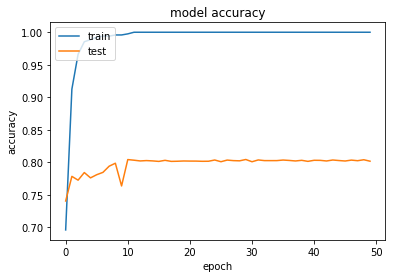

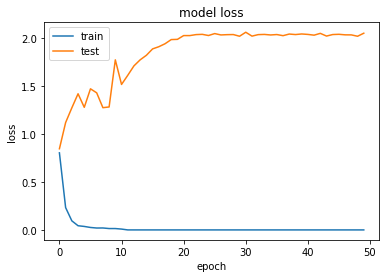

In [20]:
import matplotlib.pyplot as plt

plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [21]:
filename = validation_generator.filenames
truth = validation_generator.classes
label = validation_generator.class_indices
indexlabel = dict((value, key) for key, value in label.items())

predicts = model.predict_generator(validation_generator, steps=validation_generator.samples/validation_generator.batch_size, verbose=1)
predict_class = np.argmax(predicts, axis=1)
errors = np.where(predict_class != truth)[0]
print("No of errors = {}/{}".format(len(errors),validation_generator.samples))

352/351 [==============================] - 60s 171ms/step
No of errors = 9662/11233


c:\users\reza-lab\appdata\local\programs\python\python35\lib\site-packages\keras_preprocessing\image.py:1131: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
c:\users\reza-lab\appdata\local\programs\python\python35\lib\site-packages\keras_preprocessing\image.py:1139: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Confusion matrix
[[187 234 241 178 252 317 143]
 [226 263 261 170 278 349 145]
 [166 243 226 172 240 287 145]
 [199 266 264 159 272 311 161]
 [172 295 285 160 260 332 160]
 [190 274 285 192 277 341 171]
 [167 190 254 172 248 318 135]]


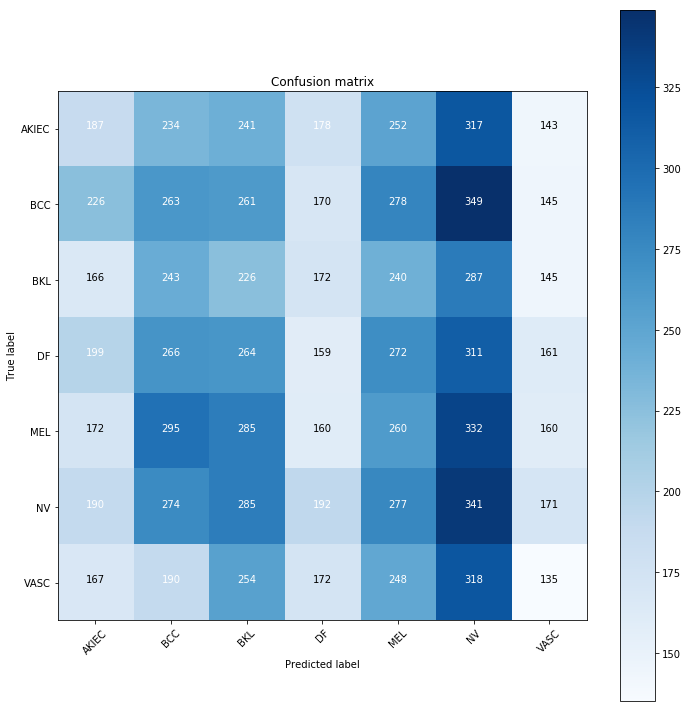

In [22]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(truth,predict_class)

labels = []
for k,v in indexlabel.items():
    labels.append(v)
    
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    

plt.figure(figsize=(10,10))
plot_confusion_matrix(cm, classes=labels,
                      title='Confusion matrix')

In [ ]:
######################################################################################

In [13]:
model = Sequential()
model.add(Conv2D(64, (11, 11), padding='valid', input_shape=(448,448,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.6))

model.add(Conv2D(128, (7, 7), padding='valid'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.6))

model.add(Conv2D(192, (3, 3), padding='valid'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.6))

model.add(Conv2D(256, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.6))

model.add(Flatten())
model.add(Dense(4096))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(4096))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.6))

model.add(Dense(7))
model.add(BatchNormalization())
model.add(Activation('softmax'))

from keras import losses, metrics, regularizers
model.compile(optimizer = adam_opt, loss = losses.categorical_crossentropy, metrics=[metrics.categorical_accuracy])

In [14]:
history = model.fit_generator(train_generator,
    steps_per_epoch=2048,
    epochs = epochs,
    validation_data = validation_generator,
    validation_steps=1024)

Epoch 1/50


c:\users\reza-lab\appdata\local\programs\python\python35\lib\site-packages\keras_preprocessing\image.py:1131: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
c:\users\reza-lab\appdata\local\programs\python\python35\lib\site-packages\keras_preprocessing\image.py:1139: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


2048/2048 [==============================] - 983s 480ms/step - loss: 1.7192 - categorical_accuracy: 0.3144 - val_loss: 2.6856 - val_categorical_accuracy: 0.1513
Epoch 2/50
2048/2048 [==============================] - 964s 471ms/step - loss: 1.4519 - categorical_accuracy: 0.4437 - val_loss: 2.4843 - val_categorical_accuracy: 0.1505
Epoch 3/50
  91/2048 [>.............................] - ETA: 12:39 - loss: 1.4026 - categorical_accuracy: 0.4650

KeyboardInterrupt: 

In [ ]:
score = model.evaluate_generator(validation_generator, steps=50)

print ('Test Score: ', score[0])
print ('Test Accuracy: ',score[1])

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
filename = validation_generator.filenames
truth = validation_generator.classes
label = validation_generator.class_indices
indexlabel = dict((value, key) for key, value in label.items())

predicts = model.predict_generator(validation_generator, steps=validation_generator.samples/validation_generator.batch_size, verbose=1)
predict_class = np.argmax(predicts, axis=1)
errors = np.where(predict_class != truth)[0]
print("No of errors = {}/{}".format(len(errors),validation_generator.samples))

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(truth,predict_class)

labels = []
for k,v in indexlabel.items():
    labels.append(v)
    
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    

plt.figure(figsize=(10,10))
plot_confusion_matrix(cm, classes=labels,
                      title='Confusion matrix')

In [ ]:
###################################################################################################################

In [10]:
## Intilizing variables
output_classes = 7

batch_size = 8
epochs = 50
adam_opt = Adam(lr=1e-5, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=1e-5)

In [11]:
from keras.preprocessing.image import ImageDataGenerator

# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    featurewise_center=True,
    featurewise_std_normalization=True)


# target_size = (height, width)
target_size = (224, 224)


train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size = target_size,       
        class_mode = 'categorical',
        shuffle = True)

validation_generator = train_datagen.flow_from_directory(
        validation_dir,
        target_size = target_size,        
        class_mode = 'categorical',
        shuffle = True)

Found 27827 images belonging to 7 classes.
Found 11233 images belonging to 7 classes.


In [12]:
# Initialize model
alexnet = Sequential()
l2_reg=0
# Layer 1
alexnet.add(Conv2D(96, (11, 11), input_shape=(224, 224, 3),padding='same', kernel_regularizer=l2(l2_reg)))
alexnet.add(BatchNormalization())
alexnet.add(Activation('relu'))
alexnet.add(MaxPooling2D(pool_size=(2, 2)))
alexnet.add(Dropout(0.6))

# Layer 2
alexnet.add(Conv2D(256, (5, 5), padding='same'))
alexnet.add(BatchNormalization())
alexnet.add(Activation('relu'))
alexnet.add(MaxPooling2D(pool_size=(2, 2)))
alexnet.add(Dropout(0.6))

# Layer 3
alexnet.add(Conv2D(256, 3, 3, activation='relu', border_mode='same'))
# alexnet.add(ZeroPadding2D((1, 1)))
# alexnet.add(Conv2D(512, (3, 3), padding='same'))
alexnet.add(BatchNormalization())
alexnet.add(Activation('relu'))
alexnet.add(MaxPooling2D(pool_size=(2, 2)))
alexnet.add(Dropout(0.6))

# Layer 4
alexnet.add(Conv2D(512, 3, 3, activation='relu', border_mode='same'))
# alexnet.add(ZeroPadding2D((1, 1)))
# alexnet.add(Conv2D(1024, (3, 3), padding='same'))
alexnet.add(BatchNormalization())
alexnet.add(Activation('relu'))
alexnet.add(Dropout(0.6))

# Layer 5
alexnet.add(Conv2D(1024, 3, 3, activation='relu', border_mode='same'))
# alexnet.add(ZeroPadding2D((1, 1)))
# alexnet.add(Conv2D(1024, (3, 3), padding='same'))
alexnet.add(BatchNormalization())
alexnet.add(Activation('relu'))
alexnet.add(MaxPooling2D(pool_size=(2, 2)))
alexnet.add(Dropout(0.6))

# Layer 6
alexnet.add(Flatten())
alexnet.add(Dense(1024))
alexnet.add(BatchNormalization())
alexnet.add(Activation('relu'))
alexnet.add(Dropout(0.5))

# Layer 7
alexnet.add(Dense(7))
alexnet.add(BatchNormalization())
alexnet.add(Activation('relu'))
alexnet.add(Dropout(0.5))

# Layer 8
alexnet.add(Dense(7))#7classes
alexnet.add(BatchNormalization())
alexnet.add(Activation('softmax'))


from keras import losses, metrics, regularizers
alexnet.compile(optimizer = adam_opt, loss = losses.categorical_crossentropy, metrics=[metrics.categorical_accuracy])

c:\users\reza-lab\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:19: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (3, 3), activation="relu", padding="same")`
c:\users\reza-lab\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:28: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(512, (3, 3), activation="relu", padding="same")`
c:\users\reza-lab\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:36: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(1024, (3, 3), activation="relu", padding="same")`


In [14]:
history = alexnet.fit_generator(train_generator,
    steps_per_epoch=200,
    epochs = epochs,
    validation_data = validation_generator,
    validation_steps=100)

Epoch 1/50


ResourceExhaustedError: OOM when allocating tensor with shape[32,112,112,256] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[{{node training/Adam/gradients/zeros_37-0-1-TransposeNCHWToNHWC-LayoutOptimizer}} = Transpose[T=DT_FLOAT, Tperm=DT_INT32, _device="/job:localhost/replica:0/task:0/device:GPU:0"](training/Adam/gradients/zeros_37, PermConstNCHWToNHWC-LayoutOptimizer)]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.

	 [[{{node metrics/categorical_accuracy/Mean/_469}} = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device_incarnation=1, tensor_name="edge_3988_metrics/categorical_accuracy/Mean", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.


In [ ]:
score = alexnet.evaluate_generator(validation_generator, steps=50)

print ('Test Score: ', score[0])
print ('Test Accuracy: ',score[1])

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
filename = validation_generator.filenames
truth = validation_generator.classes
label = validation_generator.class_indices
indexlabel = dict((value, key) for key, value in label.items())

predicts = model.predict_generator(validation_generator, steps=validation_generator.samples/validation_generator.batch_size, verbose=1)
predict_class = np.argmax(predicts, axis=1)
errors = np.where(predict_class != truth)[0]
print("No of errors = {}/{}".format(len(errors),validation_generator.samples))

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(truth,predict_class)

labels = []
for k,v in indexlabel.items():
    labels.append(v)
    
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    

plt.figure(figsize=(10,10))
plot_confusion_matrix(cm, classes=labels,
                      title='Confusion matrix')